# Smalls

## Task
https://smalls.notion.site/Marketing-Analyst-Technical-Challenge-Discussion-65e5d85a71224e2fb9d406f4e772ba37

## Position
https://angel.co/company/smalls/jobs/941112-data-analyst

## Questions
1. What major customer segments do you see? How are these segments different? 
2. Which segments are most valuable? 
3. What recommendations for segment-based initiatives do you have based on your analysis? 
4. What data do you wish you had received to make a more informed recommendation?

## Segmentation based on activity

There are two groups of users - ACTIVE and INACTIVE (cancelled)

- Out of INACTIVE there are users:
    - Inactive WITH orders (were on subscribsion but decided to quit)
    - Inactive WITHOUT orders (finished trial with no convertion)
- Same for ACTIVE users: 
    - Active with orders - bring money (have subscription, pay for it) and
    - Active (not cancelled) but woithout orders (on trial, no orders, negative margin)

This four groups have different business value and need different (marketing) treatment: 
- activation for users on Trial
    - education about the company
    - education about other products and services
    - education what is expected from user how to continue with the subscription
- reactivation (depend on cancellation reason)
    - if there is new product or formula (e.g. with different taste, if reason was taste)
    - discounts or campaigns
    - if too much food - smaller size subscription (several subscription sizes - S (1 per day), M (2 per day), L (3 per day))
- cross-sell
    - new products, new partnerships
- up-sell
    - other products that can be of interest (depends on the product menu options)
- support:
    - educational materials of pet health, insurance, vets
    - news about the company
    - etc.
- reaction on cancellation - strategy depends on the reason
    - what actions to take when payment details are wrong/not working
    

## Convertion and retention analysis
The biggest effort is needed in convertion from Trial and retention of new clients:
- average convertion rate after trial is 45% (-> another 55% of clients is lost)
- the biggest loss of clients happens after first order (retention 44% -> another 56% of clients is lost)

If combined with cancellation reasons analysis may help to identify key areas for improvement



### Observations:
- most of users are INACTIVE
- most have one or two cats
- most of the reasons to cancel are related to "not eating"
    - food taste, smell, texture may need to be adjusted
- Some reasons look of same type and can be joined for further analysis:
    - Taste: My cat won't eat; Cats won't eat ; Cats Stopped Eating
    - Price: Price, Pricing - don't see value
    - Dead pet: My cat is no longer here
- there is cancellation due to wrong payment data
- for users that had subscription and cancelled the most popular reason may need to be identified ("Others")
- The most common order periods are 4,3 and 2 weeks
- most of the clients quit after 4 orders

**NB.** Last month of data is not complete and in some parts of analysis needs to be excluded.

## Questions
- Why some orders have negative margin? What is the reason: shipping costs, production costs, discounts (campaigns), cost of aquisition? 
- There are users with big negative margin (example in "top 10 least profitable clients"). What is the reason to keep such clients and not prevent such cases early?
- Some cancellation reasons are not clear: CWE - Abandon Trial, CWE - Made Effort
- What is the cancellation reason if there was only Trial? 
- Do customers when signing for trial simulataniously sign for subscription (provide card details): if not cancelled during trial period -> then get first payment -> then get order delivered??? This is typical model (not the best, but... LinkedIn, Amazon, etc. use this model for trial)
- How company works with cancellation reasons:
    - Is there a workaround to send customer trial of another food type if reason for cancellation is related to "not eating"
    - Does the company send a letter of condolence if the reason for the cancellation is related to the death of cats?
- Can same user get a trial of another product? How it will be reflected in the data
- How company deals with fraudsters?
    - Cases when user changes identity: like same address different but id
    - several samples to same address
    - payment attempts limit?
- There is a duplicate in CUSTOMERS table (Customer_ID is not unique). Is it only a test case or data storage allows not unique ID?
- What is an ideal client or client personas? 
- How advertisement is optimized based on personas (similar audience etc.)?

## Extra data to enrich dataset
- Geography data: 
    - different peformance can be in different cities, states
    - Margin analysis is also related to the cost of delivery
- For financial results: Cost of aquisition per channel
- What is in the basket per each order (may it vary on quantity and products)?
- How the communication with clients is organized?
- Cat info: breed, age, etc. (can improve targeting)
- Client info (persona)





In [1]:
# hide code

from IPython.display import display, HTML

HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()">
  <input type="submit" id="toggleButton" value="Show Code">
</form>
''')

## Data

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

path=r'C:\a_job\2022\smalls (cat food)\task'

import sys
sys.path.append(path)

import imp
util = imp.load_source('date_time', r'C:\a_job\2022\smalls (cat food)\date_time.py')

import date_time

In [3]:
df_o=pd.read_excel(f"{path}\data\Analyst Exercise - FACT_ORDERS.xlsx")
df_c=pd.read_excel(f"{path}\data\Analyst Exercise - DIM_CUSTOMERS.xlsx")

print(f"Data contains \nCustomer rows: {df_c.shape[0]} \nOrder rows: {df_o.shape[0]}")

Data contains 
Customer rows: 72717 
Order rows: 209217


In [4]:
#sample customers
display(df_c.head())

,CUSTOMER_ID,TRIAL_WEEK,TRIAL_PLAN,GA_SOURCE,GA_MEDIUM,CANCELLATION_FLAG,CANCELLATION_DATE,CANCELLATION_REASON,CAT_COUNT
0,5872104079459,2022-05-02,FRESH,bing,cpc,ACTIVE,NaT,NaN,2.0
1,5874517835875,2022-05-02,FRESH,google,cpc,ACTIVE,NaT,NaN,1.0
2,5872455876707,2022-05-02,FRESH,affiliate,impact,ACTIVE,NaT,NaN,1.0
3,5873427906659,2022-05-02,FRESH,affiliate,impact,ACTIVE,NaT,NaN,1.0
4,5872437854307,2022-05-02,FRESH,tapjoy,49bf5cbe33fdb91cd324f6102c726b4a9d1235b41c9df7...,ACTIVE,NaT,NaN,2.0


In [5]:
#sample orders
display(df_o.head())

,ORDER_ID,CUSTOMER_ID,ORDER_DATE,ORDER_SEQUENCE,ORDER_TYPE,REVENUE,MARGIN
0,3911587332195,5144374181987,2021-02-19 17:52:00,1.0,TRIAL,36.11,-12.57
1,2173509337187,2910017290339,2020-03-27 04:41:07,3.0,SUBSCRIPTION,126.00,69.60
2,3843079929955,5196139036771,2021-05-25 06:11:32,1.0,TRIAL,33.75,-2.48
3,3865901662307,5177666568291,2021-06-04 03:18:29,2.0,SUBSCRIPTION,162.00,-79.63
4,3939062480995,5304357388387,2021-07-07 23:16:40,1.0,TRIAL,33.75,-51.84


## Preparation

In [6]:
#---
cid='CUSTOMER_ID'
oid='ORDER_ID'

# ---
c_cat_features=['TRIAL_PLAN', 'GA_SOURCE', 'GA_MEDIUM',
       'CANCELLATION_FLAG','CANCELLATION_REASON',
       'CAT_COUNT']
c_date_features=['TRIAL_WEEK','CANCELLATION_DATE']

# trial week - a date that starts with monday

# ---
o_cat_features=['ORDER_TYPE', 'ORDER_SEQUENCE']
o_date_features=['ORDER_DATE']
o_date_features=['ORDER_SEQUENCE', 'REVENUE', 'MARGIN']

In [7]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('smalls_table.xlsx', engine='xlsxwriter')

In [8]:
#check if unique in customers

if len(df_c['CUSTOMER_ID'].unique().tolist())==df_c.shape[0]:
    print("no problem")
else:
    tmp=df_c.groupby(['CUSTOMER_ID']).size().reset_index().copy()
    tmp.rename(columns={0:"count"}, inplace =True)  
    duplicate_id=tmp.loc[tmp["count"]>1]['CUSTOMER_ID'].tolist()
    print("Duplicates in Customer", duplicate_id)
    
    display(df_c.loc[df_c['CUSTOMER_ID'].isin(duplicate_id)])
    df_c.to_excel(writer, sheet_name='Duplicat_cust_ID', startrow=1, header=True, index=False)
    #Remove duplicates
    df_c=df_c.loc[~(df_c['CUSTOMER_ID'].isin(duplicate_id))].copy()
    df_o=df_o.loc[~(df_o['CUSTOMER_ID'].isin(duplicate_id))].copy()
    


Duplicates in Customer [5359139848291]


,CUSTOMER_ID,TRIAL_WEEK,TRIAL_PLAN,GA_SOURCE,GA_MEDIUM,CANCELLATION_FLAG,CANCELLATION_DATE,CANCELLATION_REASON,CAT_COUNT
35982,5359139848291,2021-08-02,FRESH,NaN,NaN,INACTIVE,2021-08-31 12:53:17,Other,1.0
36089,5359139848291,2021-08-02,FRESH,NaN,NaN,INACTIVE,2021-08-05 09:25:37,Other,1.0


In [9]:
#check if unique in orders

if len(df_o['ORDER_ID'].unique().tolist())==df_o.shape[0]:
    print("no problem")
else:
    tmp=df_o.groupby(['ORDER_ID']).size().reset_index().copy()
    tmp.rename(columns={0:"count"}, inplace =True)  
    duplicate_id=tmp.loc[tmp["count"]>1]['ORDER_ID'].tolist()
    print("Duplicates in ORDERS", duplicate_id)
    
    print(df_o.loc[df_o['ORDER_ID'].isin(duplicate_id)])
    df_o.to_excel(writer, sheet_name='Duplicat_ord_ID', startrow=1, header=True, index=False)
    
    #Remove duplicates
    df_o=df_o.loc[~(df_o['ORDER_ID'].isin(duplicate_id))].copy()

no problem


In [10]:
# convert dates

df_o=date_time.date_parsing(df_o,'ORDER_DATE')
df_c=date_time.date_parsing(df_c,'TRIAL_WEEK')
df_c=date_time.date_parsing(df_c,'CANCELLATION_DATE')

# some columns are int not float
df_o['ORDER_SEQUENCE']=df_o['ORDER_SEQUENCE'].astype('Int64')

#fillna
for c in ['GA_SOURCE', 'GA_MEDIUM','CANCELLATION_REASON']:
    df_c[c].fillna('No_data', inplace=True)

In [11]:
# orders without Trial?

tmp=pd.merge(df_o,df_c, on=cid, how='left')
a=tmp.loc[(tmp['ORDER_SEQUENCE'].notnull()) & (tmp['ORDER_SEQUENCE']==1)][[cid,'ORDER_DATE','TRIAL_WEEK', 'TRIAL_WEEK_WeekDay']]
a['valid']=(a['ORDER_DATE']>=a['TRIAL_WEEK'])*1

a.loc[a['valid']==0].to_excel(writer, sheet_name='Order_no_Trial', startrow=1, header=True, index=False)
# orders without Trial?
print(f"Users that made order without Trial {a.loc[a['valid']==0].shape[0]}")

Users that made order without Trial 378


In [12]:
print("--- DATES ----------")
print(f"Customers: \nfrom {df_c['TRIAL_WEEK_ymd'].min()} to {df_c['TRIAL_WEEK_ymd'].max()}")
print(f"Orders: from {df_o['ORDER_DATE_ymd'].min()} to {df_o['ORDER_DATE_ymd'].max()}")

#--- Orders before customers first week? ?????? test cases?
tmp=pd.merge(df_o, df_c, on=cid, how='left')

#if order appears before trial, but trial can be null
tmptmp=tmp.loc[~((tmp['TRIAL_WEEK_ymd']<=tmp['ORDER_DATE_ymd']) | (tmp['TRIAL_WEEK'].isna())) ] 

strange_cid=tmptmp[cid].unique().tolist()

#to excel
df_c.loc[df_c[cid].isin(strange_cid)].to_excel(writer, sheet_name='Order_before_Trial_C', startrow=1, header=True, index=False)
df_o.loc[df_o[cid].isin(strange_cid)].to_excel(writer, sheet_name='Order_before_Trial_O', startrow=1, header=True, index=False)

print('Types of orders with order date before trial week date')
display(pd.DataFrame(tmptmp['ORDER_TYPE'].value_counts()))

--- DATES ----------
Customers: 
from 20200106 to 20220502
Orders: from 20180711 to 20220505
Types of orders with order date before trial week date


,ORDER_TYPE
CANCELLED,153
REPLACEMENT,14


In [13]:
# delete strange (if order is before trial week)
df_c=df_c.loc[~df_c[cid].isin(strange_cid)].copy()
df_o=df_o.loc[~df_o[cid].isin(strange_cid)].copy()

In [14]:
print("--- DATES (after cleaning) ----------")
print(f"Customers: from {df_c['TRIAL_WEEK_ymd'].min()} to {df_c['TRIAL_WEEK_ymd'].max()}")
print(f"Orders: from {df_o['ORDER_DATE_ymd'].min()} to {df_o['ORDER_DATE_ymd'].max()}")
print("NB. Data may contain orders of users without trial week")


--- DATES (after cleaning) ----------
Customers: from 20200106 to 20220502
Orders: from 20200101 to 20220505
NB. Data may contain orders of users without trial week


In [15]:
#check if all clients from Orders have data in Clients
a=df_o[[cid,oid]].groupby([cid]).size().reset_index()

customers_orders=df_o[cid].unique().tolist()
customers=df_c[cid].unique().tolist()
num_cust=len(customers)

customers_not_in_df_c=[c for c in customers_orders if c not in customers ]

#to excel
df_o.loc[df_o[cid].isin(customers_not_in_df_c)].to_excel(writer, sheet_name='Order_no_customer', startrow=1, header=True, index=False)


print(f'There are {len(customers_not_in_df_c)} customers in order that we lack data in customer table')
print(f"There are {df_o.loc[df_o[cid].isin(customers_not_in_df_c)].shape[0]} orders for those clients")
print("Reason can be either with lagging user data or with GA")

There are 378 customers in order that we lack data in customer table
There are 1895 orders for those clients
Reason can be either with lagging user data or with GA


In [16]:
# use only data from orders with data in customers table
df_o=df_o.loc[df_o[cid].isin(customers)]

In [17]:
# sort by date
df_o=df_o.sort_values([cid,oid,'ORDER_DATE']).copy()

## Exploration

In [18]:
#add feature 
#combinations
df_c['PLAN_and_FLAG']=df_c.apply(lambda x: f"{x['CANCELLATION_FLAG']}__{x['TRIAL_PLAN']}", axis=1)
c_cat_features.append('PLAN_and_FLAG')

df_c['REASON_PLAN']=df_c.apply(lambda x: f"({x['TRIAL_PLAN']})__{x['CANCELLATION_REASON']}", axis=1)
c_cat_features.append('REASON_PLAN')

df_c['source_medium']=df_c.apply(lambda x: f"{x['GA_SOURCE']}__{x['GA_MEDIUM']}", axis=1)
c_cat_features.append('source_medium')


-----------------------
TRIAL_PLAN --- FROM customers


,TRIAL_PLAN,count,share,cum_share
0,FRESH,50015,0.736706,0.736706
1,MIX,16003,0.235720,0.972426
2,DRY,1872,0.027574,1.000000


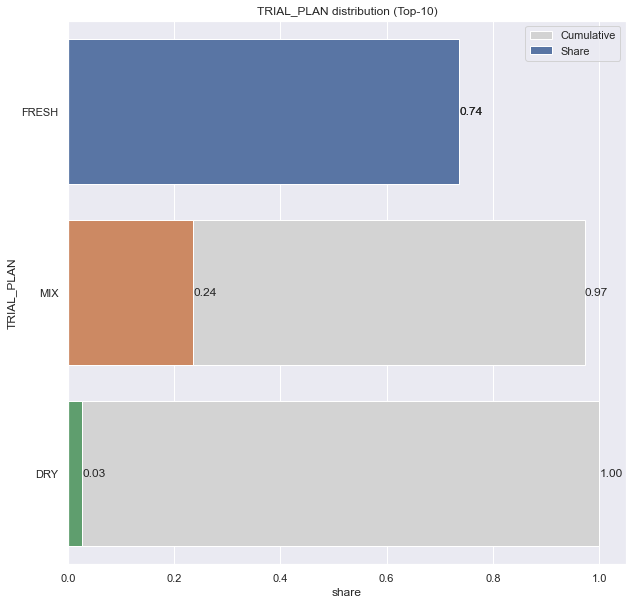

-----------------------
-----------------------
GA_SOURCE --- FROM customers


,GA_SOURCE,count,share,cum_share
0,No_data,20884,0.287750,0.287750
1,google,13252,0.182592,0.470342
2,affiliate,10432,0.143737,0.614079
3,facebook,10349,0.142593,0.756672
4,(direct),6149,0.084724,0.841396
...,...,...,...,...
108,cnet.com,1,0.000014,0.999945
109,Newsletter,1,0.000014,0.999959
110,thingtesting.com,1,0.000014,0.999972
111,coopcommerce-staging.herokuapp.com,1,0.000014,0.999986


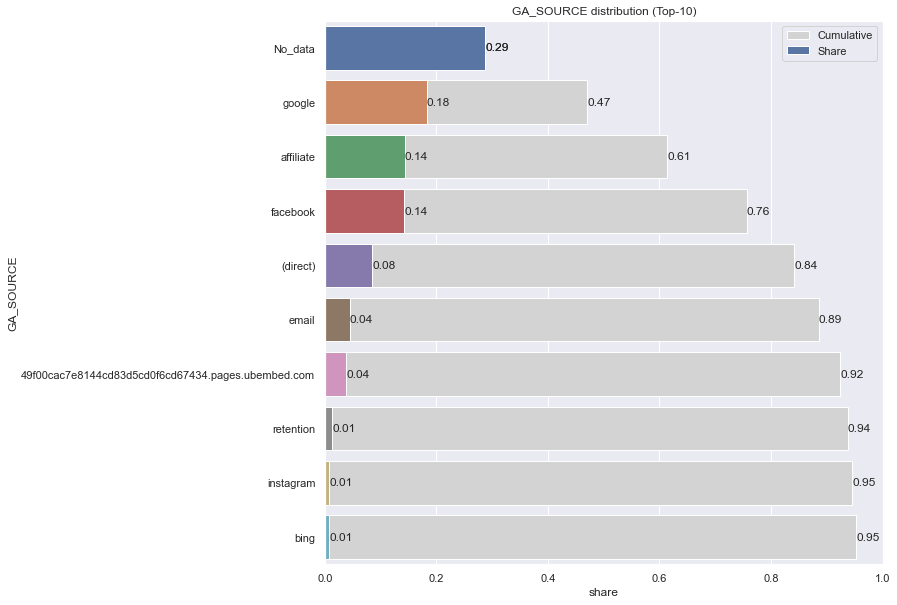

-----------------------
-----------------------
GA_MEDIUM --- FROM customers


,GA_MEDIUM,count,share,cum_share
0,No_data,20884,0.287750,0.287750
1,impact,10409,0.143420,0.431170
2,cpc,9050,0.124695,0.555865
3,(none),6149,0.084724,0.640589
4,organic,5013,0.069071,0.709660
...,...,...,...,...
130,c82d9b7936da8744512fc0eab7fb86fd4374a9843b1785...,1,0.000014,0.999945
131,613247de1caf4b162c13b223f6b1e83aec760eee18ce0c...,1,0.000014,0.999959
132,94607571b6ab13776e996b9d17a6319f44089a3a7c7af3...,1,0.000014,0.999972
133,3656948647c7f18149d0b8e7dda1a4320283ea88c3fe0c...,1,0.000014,0.999986


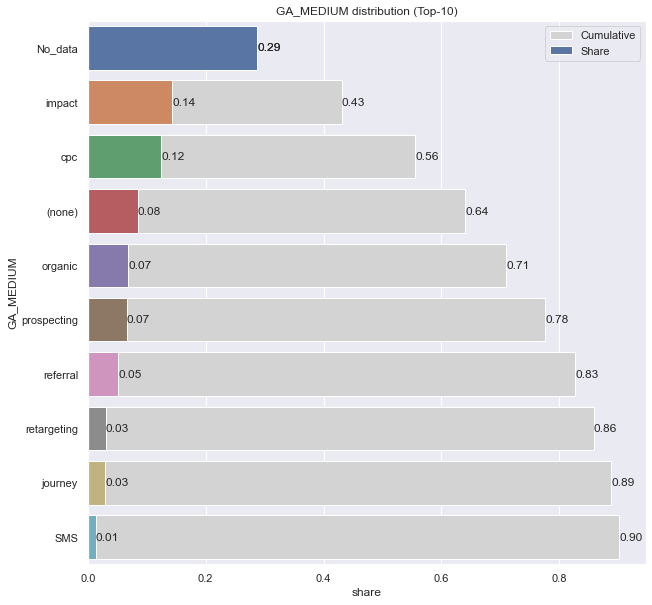

-----------------------
-----------------------
CANCELLATION_FLAG --- FROM customers


,CANCELLATION_FLAG,count,share,cum_share
0,INACTIVE,55066,0.758725,0.758725
1,ACTIVE,17511,0.241275,1.000000


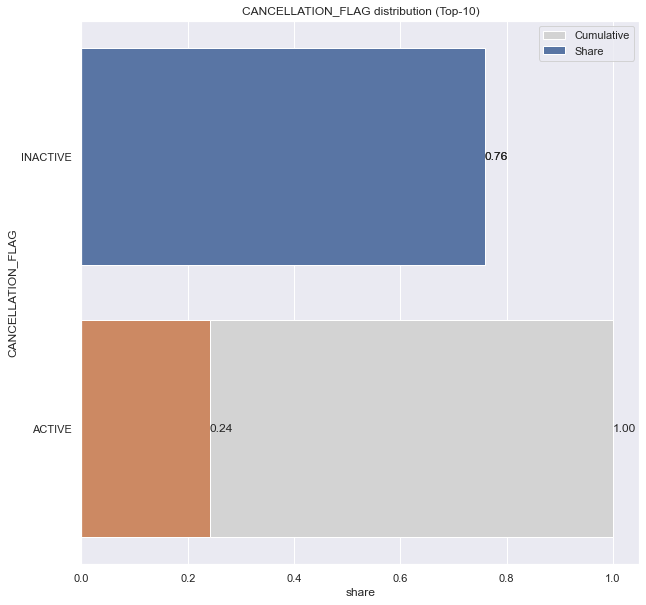

-----------------------
-----------------------
CANCELLATION_REASON --- FROM customers


,CANCELLATION_REASON,count,share,cum_share
0,No_data,18200,0.250768,0.250768
1,CWE - Abandon Trial,7001,0.096463,0.347231
2,CWE - Made Effort,6969,0.096022,0.443253
3,Other,4982,0.068644,0.511898
4,My cat won't eat,4800,0.066137,0.578034
5,Unknown,4415,0.060832,0.638866
6,Cats won't eat,3974,0.054756,0.693622
7,Price,3742,0.051559,0.745181
8,Max Number of Charge attempts reached,2512,0.034612,0.779792
9,Not interested in a subscription,1618,0.022294,0.802086


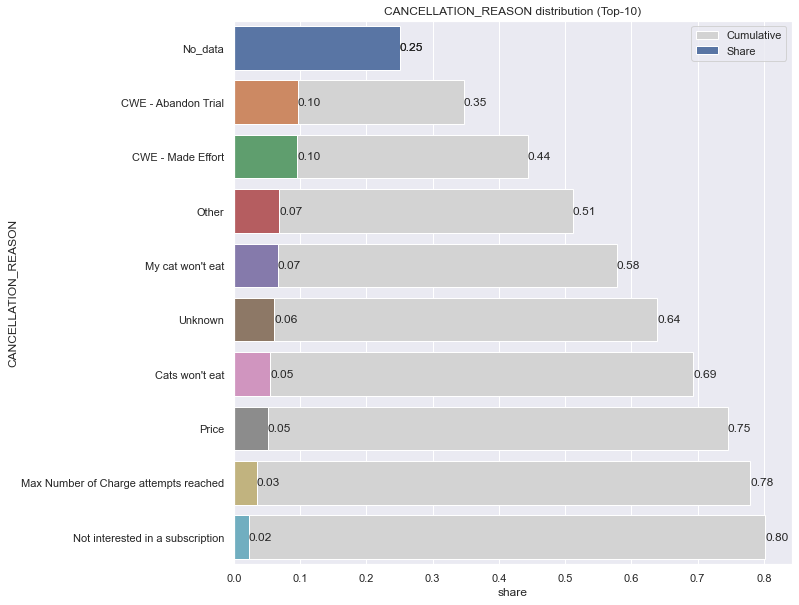

-----------------------
-----------------------
CAT_COUNT --- FROM customers


,CAT_COUNT,count,share,cum_share
0,1.0,35480,0.526113,0.526113
1,2.0,22446,0.332839,0.858952
2,3.0,5712,0.084700,0.943652
3,4.0,2074,0.030754,0.974406
4,5.0,736,0.010914,0.985320
5,6.0,421,0.006243,0.991563
6,7.0,193,0.002862,0.994425
7,10.0,160,0.002373,0.996797
8,8.0,136,0.002017,0.998814
9,9.0,80,0.001186,1.000000


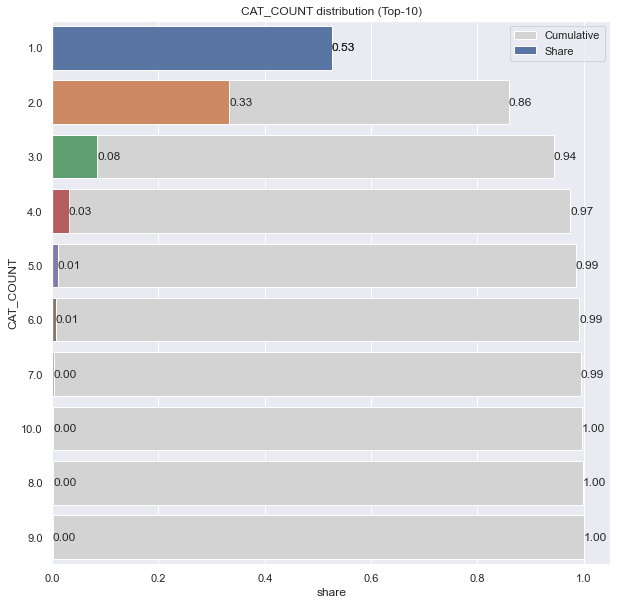

-----------------------
-----------------------
PLAN_and_FLAG --- FROM customers


,PLAN_and_FLAG,count,share,cum_share
0,INACTIVE__FRESH,38008,0.523692,0.523692
1,INACTIVE__MIX,13101,0.180512,0.704204
2,ACTIVE__FRESH,12007,0.165438,0.869642
3,ACTIVE__MIX,2902,0.039985,0.909627
4,INACTIVE__nan,2430,0.033482,0.943109
5,ACTIVE__nan,2257,0.031098,0.974207
6,INACTIVE__DRY,1527,0.021040,0.995246
7,ACTIVE__DRY,345,0.004754,1.000000


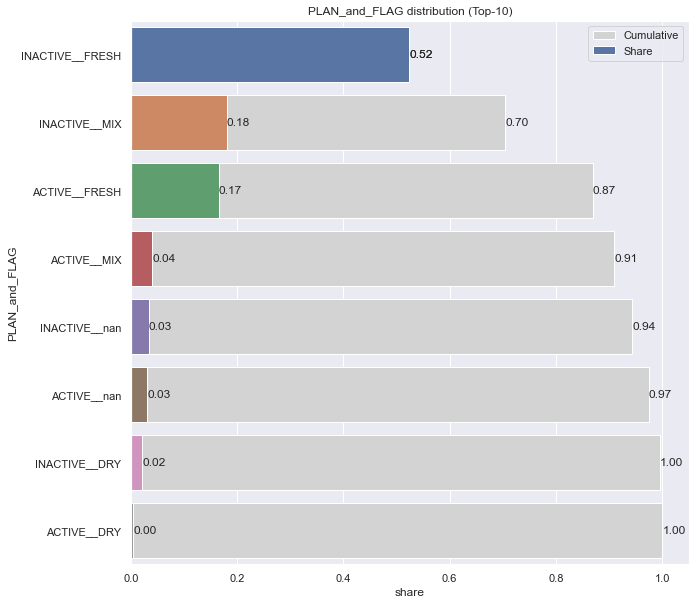

-----------------------
-----------------------
REASON_PLAN --- FROM customers


,REASON_PLAN,count,share,cum_share
0,(FRESH)__No_data,12476,0.171900,0.171900
1,(FRESH)__CWE - Abandon Trial,5421,0.074693,0.246593
2,(FRESH)__CWE - Made Effort,5365,0.073921,0.320515
3,(FRESH)__My cat won't eat,4279,0.058958,0.379473
4,(FRESH)__Other,3964,0.054618,0.434091
...,...,...,...,...
170,(MIX)__influencer cancel,1,0.000014,0.999945
171,(DRY)__Ops Inconsistency,1,0.000014,0.999959
172,(DRY)__Remove Mouser that were gliched,1,0.000014,0.999972
173,(DRY)__Remove Liquid Gold from all subscriptions,1,0.000014,0.999986


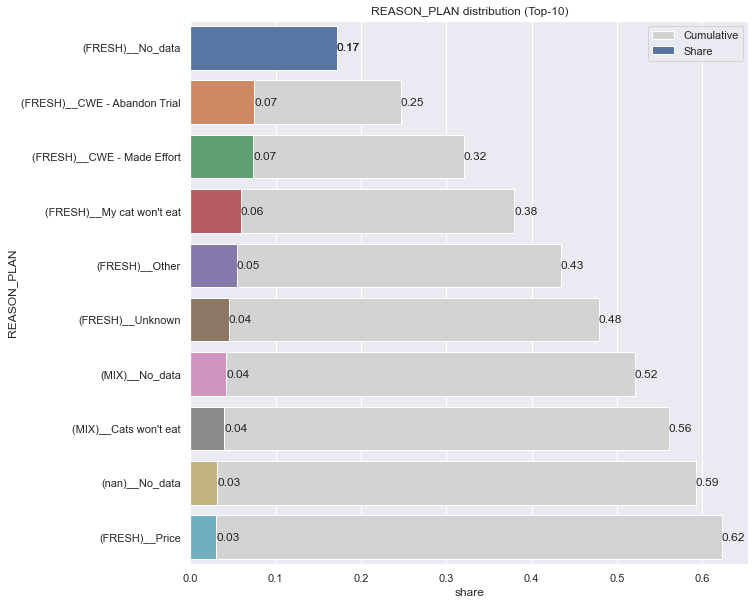

-----------------------
-----------------------
source_medium --- FROM customers


,source_medium,count,share,cum_share
0,No_data__No_data,20884,0.287750,0.287750
1,affiliate__impact,10409,0.143420,0.431170
2,google__cpc,8714,0.120066,0.551235
3,(direct)__(none),6149,0.084724,0.635959
4,facebook__prospecting,4712,0.064924,0.700883
...,...,...,...,...
227,tapjoy__7b0c6c676c256834a27147e8995f62214bdf92...,1,0.000014,0.999945
228,tapjoy__4cbde86325fa59f968619c4e660e4532455c5a...,1,0.000014,0.999959
229,email__(not set),1,0.000014,0.999972
230,tapjoy__36660402d30ba2de14a045814117db1171d05c...,1,0.000014,0.999986


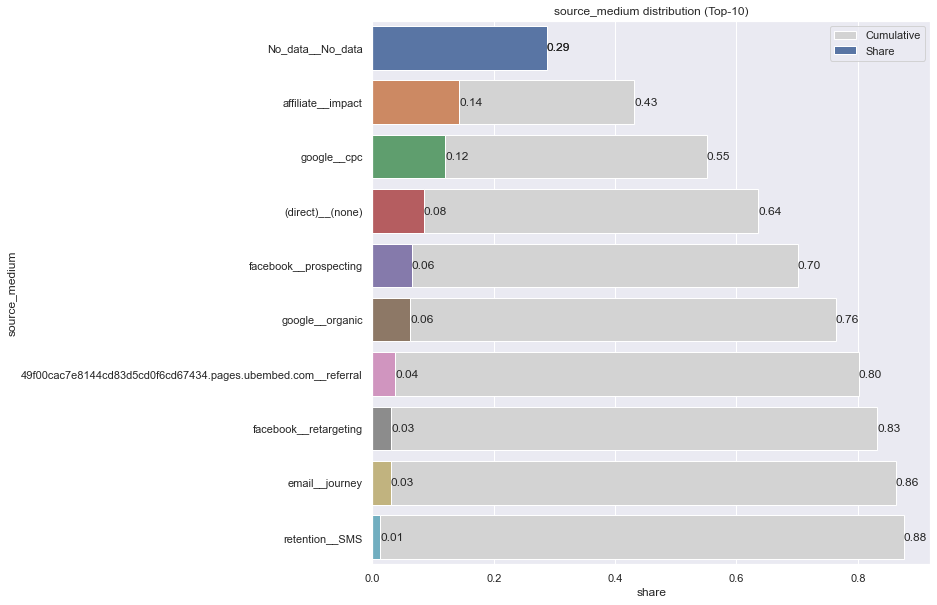

-----------------------
-----------------------
ORDER_TYPE --- FROM orders


,ORDER_TYPE,count,share,cum_share
0,SUBSCRIPTION,116299,0.562401,0.562401
1,TRIAL,72577,0.350970,0.913371
2,CANCELLED,12314,0.059548,0.972919
3,REPLACEMENT,5600,0.027081,1.000000


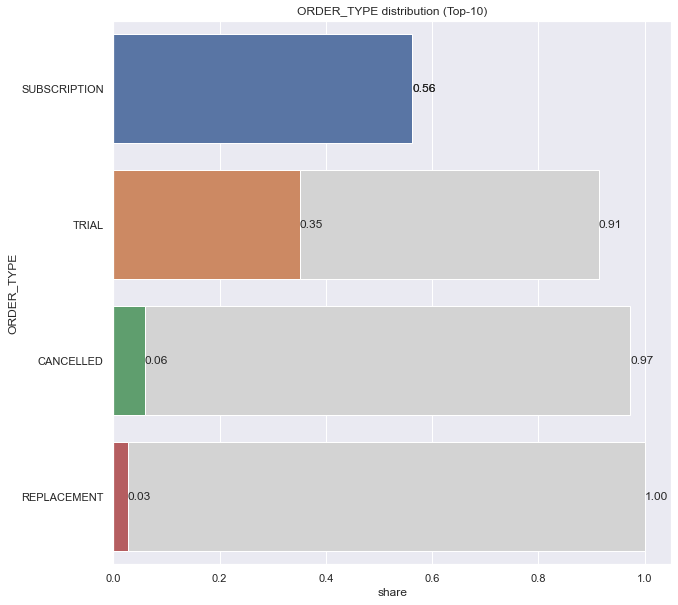

-----------------------
-----------------------
ORDER_SEQUENCE --- FROM orders


,ORDER_SEQUENCE,count,share,cum_share
0,1,72577,0.384257,0.384257
1,2,30084,0.159279,0.543537
2,3,17762,0.094041,0.637577
3,4,12729,0.067393,0.704970
4,5,9762,0.051685,0.756655
5,6,7782,0.041202,0.797857
6,7,6343,0.033583,0.831440
7,8,5268,0.027891,0.859331
8,9,4396,0.023275,0.882606
9,10,3705,0.019616,0.902222


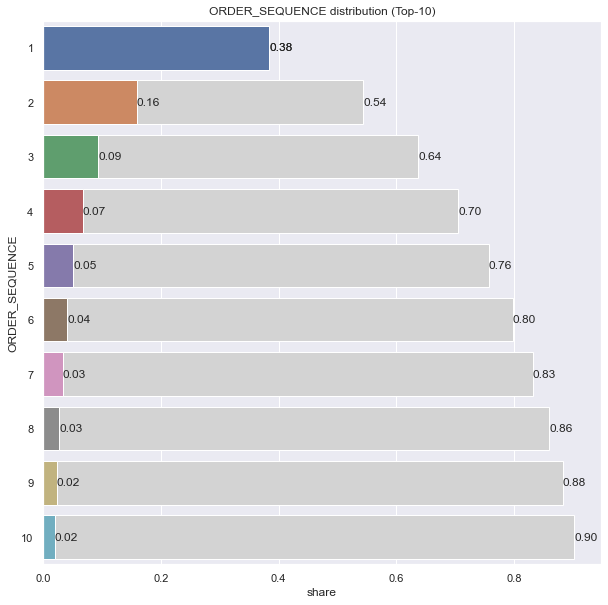

-----------------------


In [69]:
# cat features
for c in c_cat_features:
    print("-----------------------")
    print(c, "--- FROM customers")
    a=pd.DataFrame(df_c[c].value_counts()).reset_index()
    a.columns=[c,'count']
    a['share']=a['count']/a['count'].sum()
    a['cum_share']=a['share'].cumsum()

    #for i in range(a.shape[0]):
    #    a.iloc[i]
    # print(a)
    display(a)
    
    
    a[c] = a[c].astype(str)
    a=a.iloc[:min(a.shape[0],10)].copy()
    #a=a.sort_values(['share'], ascending=[True]).copy()

    fig, ax = plt.subplots()
    #ax=plt.subplots()
    #y=a[c]
    #x=a['share']
    #ax.barh(y, x, align='center') #, height=0.2
    ax=sns.barplot(x='cum_share', y=c, data=a, label='Cumulative', color='lightgrey')    
    ax=sns.barplot(x='share', y=c, data=a, label="Share")
    ax.bar_label(ax.containers[1],  fmt='%.2f', label_type='edge')
    ax.bar_label(ax.containers[0],  fmt='%.2f', label_type='edge')
    
    plt.title(f"{c} distribution (Top-10)")
    plt.legend()
    plt.show()
    plt.close()
    print("-----------------------")


for c in o_cat_features:
    print("-----------------------")
    print(c, "--- FROM orders")
    a=pd.DataFrame(df_o[c].value_counts()).reset_index()
    a.columns=[c,'count']
    a['share']=a['count']/a['count'].sum()
    a['cum_share']=a['share'].cumsum()

    
    #print(a)
    display(a)
    
    
    a[c] = a[c].astype(str)
    a=a.iloc[:min(a.shape[0],10)].copy()
    
    fig, ax = plt.subplots()

    #y=a[c]
    #x=a['share']
    #ax.barh(y, x, align='center')
    ax=sns.barplot(x='cum_share', y=c, data=a, label='Cumulative', color='lightgrey')    
    ax=sns.barplot(x='share', y=c, data=a, label="Share")
    ax.bar_label(ax.containers[1],  fmt='%.2f', label_type='edge')
    ax.bar_label(ax.containers[0],  fmt='%.2f', label_type='edge')
    
    plt.title(f"{c} distribution (Top-10)")
    plt.show()
    plt.close()
    print("-----------------------")

#### Top 10 cancellation reasons for users with orders

In [20]:
df_o['MAX_SEQUENCE']=df_o.groupby(cid)['ORDER_SEQUENCE'].transform('max')
# reason vs number of orders
tmp_cancelled=df_c.loc[df_c['CANCELLATION_FLAG']=='INACTIVE']

tmp=pd.merge(tmp_cancelled,df_o[[cid,'MAX_SEQUENCE']].drop_duplicates(), on=cid, how='left')
tmp['MAX_SEQUENCE']=tmp['MAX_SEQUENCE']-1 # remove trial order
tmp=tmp[['CANCELLATION_REASON','MAX_SEQUENCE']].groupby(['CANCELLATION_REASON']).sum().reset_index()
tmp=tmp.sort_values(['MAX_SEQUENCE'], ascending=[False])
tmp.rename(columns={'MAX_SEQUENCE':'NUM_ORDERS'}, inplace=True)
# tmp.tmp['MAX_SEQUENCE'].sum()
print("Top 10 cancellation reasons for users with orders \n") 
display(tmp.iloc[:10])

#to excel
tmp.iloc[:10].to_excel(writer, sheet_name='Top_Cancel', startrow=1, header=True, index=False)


Top 10 cancellation reasons for users with orders 



,CANCELLATION_REASON,NUM_ORDERS
29,Other,6883.0
2,CWE - Made Effort,5109.0
43,Unknown,4634.0
19,Max Number of Charge attempts reached,3737.0
31,Price,3516.0
24,No_data,2767.0
1,CWE - Abandon Trial,2742.0
22,My cat won't eat,2235.0
7,Cats Stopped Eating,2226.0
10,Dead/Gone Cat,2021.0


In [21]:
tmp=pd.merge(tmp_cancelled,df_o[[cid,'MAX_SEQUENCE']].drop_duplicates(), on=cid, how='left')
tmp['MAX_SEQUENCE']=tmp['MAX_SEQUENCE']-1 # remove trial order
tmp=tmp[['REASON_PLAN','MAX_SEQUENCE']].groupby(['REASON_PLAN']).sum().reset_index()
tmp=tmp.sort_values(['MAX_SEQUENCE'], ascending=[False])
tmp.rename(columns={'MAX_SEQUENCE':'NUM_ORDERS'}, inplace=True)
# tmp.tmp['MAX_SEQUENCE'].sum()
print("Top 10 cancellation Plan & Reasons for users with orders \n") 
display(tmp.iloc[:10])

#to excel
tmp.iloc[:10].to_excel(writer, sheet_name='Top_Cancel', startrow=13, header=True, index=False)

Top 10 cancellation Plan & Reasons for users with orders 



,REASON_PLAN,NUM_ORDERS
70,(FRESH)__Other,4135.0
43,(FRESH)__CWE - Made Effort,2699.0
83,(FRESH)__Unknown,2497.0
116,(MIX)__Other,2145.0
89,(MIX)__CWE - Made Effort,1901.0
106,(MIX)__Max Number of Charge attempts reached,1860.0
118,(MIX)__Price,1734.0
130,(MIX)__Unknown,1707.0
63,(FRESH)__My cat won't eat,1701.0
42,(FRESH)__CWE - Abandon Trial,1574.0


In [22]:
# time since trial to cancel
tmp_cancelled=tmp_cancelled.copy()
tmp_cancelled['cancel_days']=tmp_cancelled[['TRIAL_WEEK_date','CANCELLATION_DATE_date']].apply(lambda x: date_time.dif_dates(x[0],x[1]), axis=1).copy()
a=tmp_cancelled.loc[tmp_cancelled['cancel_days']<0].copy()
display(a[[cid,'TRIAL_WEEK_date','CANCELLATION_DATE_date','CANCELLATION_REASON']])
print('Problem with payment: fraudster (or card expired)')
display(df_o.loc[(df_o[cid].isin(a[cid].tolist()))])

,CUSTOMER_ID,TRIAL_WEEK_date,CANCELLATION_DATE_date,CANCELLATION_REASON
19751,5144353407075,2021-11-22,2021-05-23,Max Number of Charge attempts reached


Problem with payment: fraudster (or card expired)


,ORDER_ID,CUSTOMER_ID,ORDER_DATE,ORDER_SEQUENCE,ORDER_TYPE,REVENUE,MARGIN,ORDER_DATE_date,ORDER_DATE_ymd,ORDER_DATE_ym,ORDER_DATE_WeekDay,ORDER_DATE_WeekDayName,ORDER_DATE_WeekNum,ORDER_DATE_Year_Week,MAX_SEQUENCE
58715,4241902043235,5144353407075,2021-11-23 02:25:55,1,TRIAL,40.0,-3.41,2021-11-23,20211123,202111,1,Tue,47,2021_47,1.0


In [23]:
#remove strange data
tmp_cancelled=tmp_cancelled.loc[~(tmp_cancelled[cid].isin(a[cid].tolist()))]
df_c=df_c.loc[~(df_c[cid].isin(a[cid].tolist()))].copy()
df_o=df_o.loc[~(df_o[cid].isin(a[cid].tolist()))].copy()

In [24]:
print("Time to cancellation (All cancelled)")
display(pd.DataFrame(tmp_cancelled['cancel_days'].value_counts()))

Time to cancellation (All cancelled)


,cancel_days
15,2931
22,2136
16,1647
18,1469
17,1396
...,...
803,1
617,1
538,1
531,1


In [25]:
tmp_cancelled['cancel_days'].describe()

count    55066.000000
mean        69.404351
std         98.334900
min          0.000000
25%         18.000000
50%         32.000000
75%         74.000000
max        833.000000
Name: cancel_days, dtype: float64

In [26]:
#to excel
pd.DataFrame(tmp_cancelled['cancel_days'].describe()).reset_index().to_excel(writer, sheet_name='Cancel_days', startrow=1, header=True, index=False)

In [27]:
# order frequency
tmp=df_o['ORDER_SEQUENCE']
df_o=df_o.sort_values([cid,'ORDER_SEQUENCE'])

# cancelled and replacement orders need to be analyzed separately
# how replacement influence next orders and subscription??? 
# Orders after replacement
# will focus on factual order sequence
tmp=df_o.loc[~(df_o['ORDER_TYPE'].isin(['CANCELLED','REPLACEMENT']))].copy()

# tmp['last_order']=tmp.groupby([cid])['ORDER_DATE_date'].apply(lambda x: x.shift())

tmp['prev_order']=tmp[[cid,'ORDER_DATE_date']].groupby(cid).shift(1) 

tmp['prev_order_days']=tmp[['prev_order','ORDER_DATE_date']].apply(lambda x: date_time.dif_dates(x[0],x[1]), axis=1)

# check if there are issues 
a=tmp.loc[tmp['prev_order_days']<0]
if a.shape[0]>1:
    print("issue with prev_order_days")

c='prev_order_days'
print("-------------------------")
print(c)
a=pd.DataFrame(tmp['prev_order_days'].value_counts()).reset_index()
a.columns=[c,'count']
a['share']=a['count']/a['count'].sum()
a['cum_share']=a['share'].cumsum()
display(a)
print("-------------------------")
print(tmp['prev_order_days'].describe())

print("\n")


-------------------------
prev_order_days


,prev_order_days,count,share,cum_share
0,28.0,33209,0.285548,0.285548
1,21.0,9548,0.082099,0.367647
2,14.0,6183,0.053165,0.420812
3,56.0,5022,0.043182,0.463994
4,35.0,4465,0.038392,0.502386
...,...,...,...,...
459,598.0,1,0.000009,0.999966
460,679.0,1,0.000009,0.999974
461,218.0,1,0.000009,0.999983
462,530.0,1,0.000009,0.999991


-------------------------
count    116299.000000
mean         35.029777
std          32.421112
min           0.000000
25%          21.000000
50%          28.000000
75%          37.000000
max         788.000000
Name: prev_order_days, dtype: float64




In [28]:
#to excel
pd.DataFrame(tmp['prev_order_days'].describe()).reset_index().to_excel(writer, sheet_name='Orders_freq', startrow=1, header=True, index=False)

In [29]:
# active clients with orders (after trial)
print("Current user status")
#print(df_c['CANCELLATION_FLAG'].value_counts())
tmptmp=df_c.groupby(['CANCELLATION_FLAG']).size().reset_index()
tmptmp.rename(columns={0: "number"}, inplace=True)
tmptmp['share']=tmptmp['number']/tmptmp['number'].sum()
display(tmptmp)


Current user status


,CANCELLATION_FLAG,number,share
0,ACTIVE,17511,0.241275
1,INACTIVE,55066,0.758725


Current active users with at least one order. These users actually create moneyflow (if margin positive), as result of the orders food needs to be produced and delivered. So this is factual demand according to which production should be planned.

In [30]:
tmp=df_o.loc[(df_o['ORDER_SEQUENCE'].notnull()) & (df_o['ORDER_SEQUENCE']>1)][[cid]].drop_duplicates()
print("\nCurrent active users with at least one order (not trial)")
tmp=pd.merge(df_c.loc[df_c['CANCELLATION_FLAG']=='ACTIVE'][[cid]],tmp, on=cid, how="inner")
print(f"Active users (with subscription) : {tmp.shape[0]}")
print(f"Active users share: {100*tmptmp.loc[tmptmp['CANCELLATION_FLAG']=='ACTIVE']['share'].values[0]:2f} %")
print(f"Active users with current subscription share: {100*tmp.shape[0]/tmptmp['number'].sum():2f} %")


Current active users with at least one order (not trial)
Active users (with subscription) : 10845
Active users share: 24.127478 %
Active users with current subscription share: 14.942750 %


## Marketing insights

In [31]:
# By channel
tmp=df_o.groupby([cid])[['REVENUE', 'MARGIN']].sum().reset_index()
tmptmp=pd.merge(df_c,tmp, on=cid, how='left')


a=tmptmp.groupby('GA_SOURCE')[['REVENUE', 'MARGIN']].sum()
print ("\nTop 10 BEST sources by Revenue")
display(a.sort_values('REVENUE', ascending=[False]).head(10))
#to excel
a.sort_values('REVENUE', ascending=[False]).head(10).to_excel(writer, sheet_name='Mark_REVENUE', startrow=1, header=True, index=True)

print ("\nTop 10 WORST sources by Revenue")
display(a.sort_values('REVENUE', ascending=[True]).head(10))
#to excel
a.sort_values('REVENUE', ascending=[True]).head(10).to_excel(writer, sheet_name='Mark_REVENUE', startrow=15, header=True, index=True)

print ("\nTop 10 BEST sources by MARGIN")
display(a.sort_values('MARGIN', ascending=[False]).head(10))
#to excel
a.sort_values('MARGIN', ascending=[False]).head(10).to_excel(writer, sheet_name='Mark_REVENUE', startrow=30, header=True, index=True)

print ("\nTop 10 WORST sources by MARGIN")
display(a.sort_values('MARGIN', ascending=[True]).head(10))
#to excel
a.sort_values('MARGIN', ascending=[True]).head(10).to_excel(writer, sheet_name='Mark_REVENUE', startrow=45, header=True, index=True)


a=tmptmp.groupby('source_medium')[['REVENUE', 'MARGIN']].sum()
print ("\nTop 10 BEST sources_media combination by MARGIN")
display(a.sort_values('MARGIN', ascending=[False]).head(10))
#to excel
a.sort_values('MARGIN', ascending=[False]).head(10).to_excel(writer, sheet_name='Mark_REVENUE', startrow=45, header=True, index=True)

print ("\nTop 10 WORST sources_media combination by MARGIN")
display(a.sort_values('MARGIN', ascending=[True]).head(10))
#to excel
a.sort_values('MARGIN', ascending=[True]).head(10).to_excel(writer, sheet_name='Mark_REVENUE', startrow=45, header=True, index=True)


Top 10 BEST sources by Revenue


,REVENUE,MARGIN
GA_SOURCE,,
No_data,6697683.76,1177431.68
google,3139029.87,662044.37
affiliate,2338322.54,443156.11
facebook,1997094.12,285865.83
(direct),1799965.48,326930.15
49f00cac7e8144cd83d5cd0f6cd67434.pages.ubembed.com,694477.89,102973.89
email,574869.92,62032.94
retention,190124.25,34612.73
impact_affiliate,176472.22,40029.13



Top 10 WORST sources by Revenue


,REVENUE,MARGIN
GA_SOURCE,,
foodrepublic.com,32.25,-5.61
snapchat,33.75,-4.95
link.edgepilot.com,33.75,-11.02
msn.com,33.75,-18.41
command-center.uiprod.west2.steelhouse.com,33.75,-20.86
pet.reviews,33.75,-8.41
webmail1.earthlink.net,33.75,-7.03
nymag.com,35.00,-4.76
tiktok.com,35.00,-9.60



Top 10 BEST sources by MARGIN


,REVENUE,MARGIN
GA_SOURCE,,
No_data,6697683.76,1177431.68
google,3139029.87,662044.37
affiliate,2338322.54,443156.11
(direct),1799965.48,326930.15
facebook,1997094.12,285865.83
49f00cac7e8144cd83d5cd0f6cd67434.pages.ubembed.com,694477.89,102973.89
email,574869.92,62032.94
impact_affiliate,176472.22,40029.13
retention,190124.25,34612.73



Top 10 WORST sources by MARGIN


,REVENUE,MARGIN
GA_SOURCE,,
partnership,7963.75,-2087.94
app.shortcut.com,1233.50,-685.51
newsletter,617.00,-140.97
mercola.com,1765.75,-104.30
consumervoice.org,302.75,-89.02
lolcats.com,176.75,-88.90
nortonsafe.search.ask.com,214.75,-85.90
oceanhero.today,141.75,-70.05
mail.google.com,873.25,-68.48



Top 10 BEST sources_media combination by MARGIN


,REVENUE,MARGIN
source_medium,,
No_data__No_data,6697683.76,1177431.68
affiliate__impact,2335170.29,443065.79
google__cpc,1917860.17,392029.80
(direct)__(none),1799965.48,326930.15
google__organic,1221169.70,270014.57
facebook__prospecting,1095181.49,140304.84
49f00cac7e8144cd83d5cd0f6cd67434.pages.ubembed.com__referral,694477.89,102973.89
facebook__retargeting,358018.38,56645.20
retention__SMS,183134.50,32442.67



Top 10 WORST sources_media combination by MARGIN


,REVENUE,MARGIN
source_medium,,
email__partner,18449.75,-1615.56
partnership__blast,4835.00,-1581.78
app.shortcut.com__referral,1233.50,-685.51
influencer__centus,2844.50,-351.09
tapjoy__3a10ae822df8dc11791475fc9650814cb2ba60c014042c5dad6e37f5170aff96fe621ec4b77c72724e96068d2998b40ad78d0d065962a5a74afca25a2d04dca15324a80c8ab12f0dda0cc84180a7a76637e79eacb5e781ad3cdbb6d6dbddc88e,3741.00,-349.76
partnership__email,2539.75,-329.26
tapjoy__7745acef806c4a1ae5292d83a72f9c99beada18afc24223c91696661d47554b0fb7af3a7ebc4bc50ba0240aba44f577158489c5b336a28162042c970b70979174211262578841120ee314978cb35d89bfc75c676581403a5252fd14d82d4489c,1608.75,-278.26
partnership__influencer,589.00,-176.90
newsletter__email,617.00,-140.97


### Qestions not covered:
- Convertion by channel
- Convertion by channel_medium combination

## Convertion funnel. Customer satisfaction analysis


- Helps to understand if company can build long-term relations?
- can show distribution of orders from clients of different maturity (what clients company serves each month)


Cohorts = users acquired whithin month

NB. 

- Better to use week as it is constant in length
- Funnel depth is dependant on the maturity (months since activation)

In [32]:
# understanding sequence

order_trial_num=df_o.loc[(df_o['ORDER_SEQUENCE'].notnull()) & (df_o['ORDER_SEQUENCE']==1)].shape[0]
if order_trial_num==len(customers):
    print("All customers first get sample")
else:
    print(f"Some customers haven't got trial sample ({len(customers)-order_trial_num})")

# number of converted 
converted=df_o.loc[(df_o['ORDER_SEQUENCE'].notnull()) & (df_o['ORDER_SEQUENCE']>1),cid].unique()
num_conv=len(converted)
not_converted=[x for x in customers if x not in converted]
print(f"{num_conv} customers converted after trial ({100*num_conv/num_cust:.2f}%)")  
     

Some customers haven't got trial sample (1)
30084 customers converted after trial (41.45%)


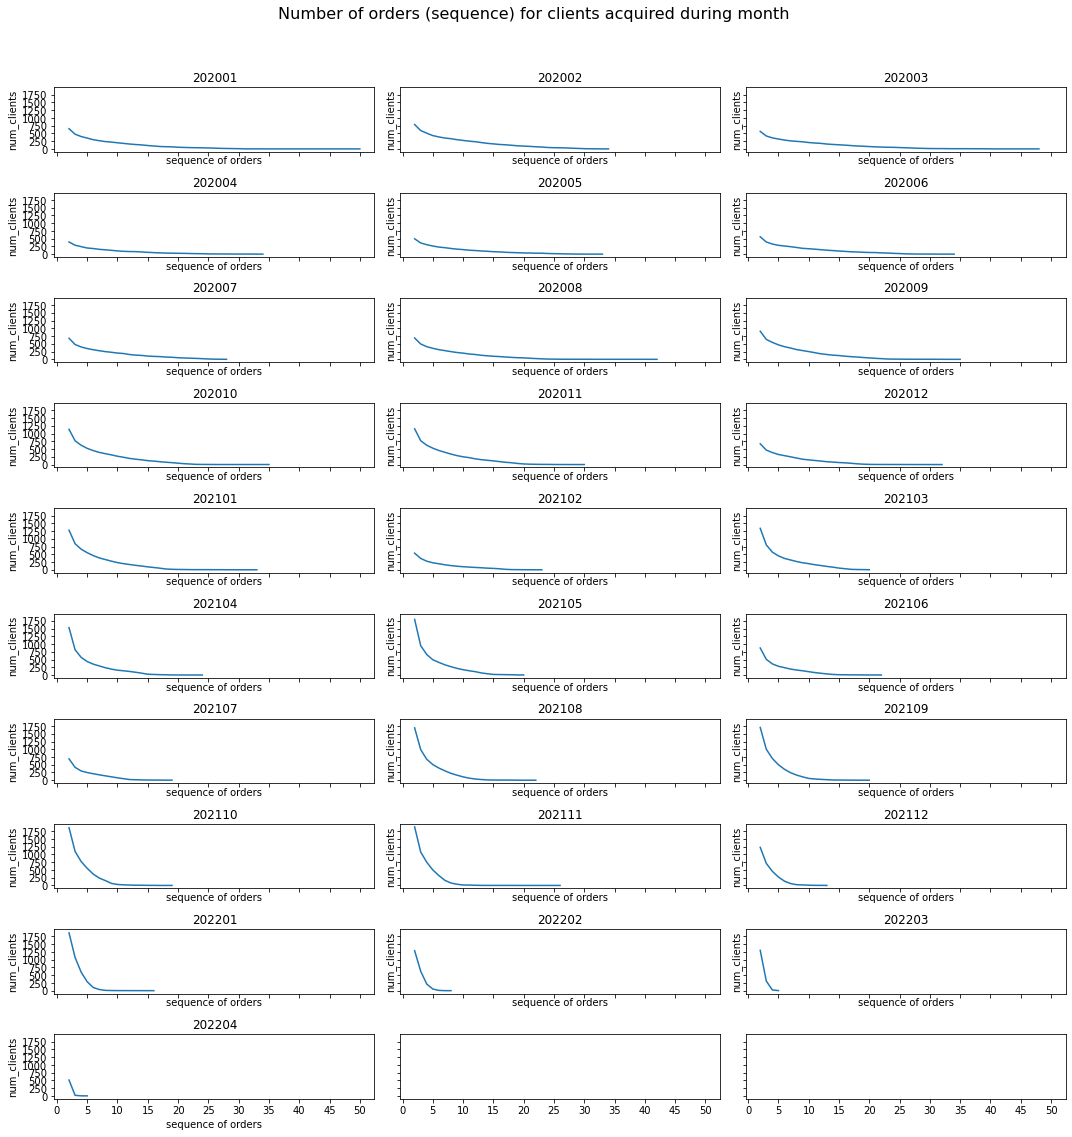

In [33]:
tmp=df_o.loc[(df_o['ORDER_TYPE']=='SUBSCRIPTION')].copy()
tmp=pd.merge(tmp, df_c[[cid, 'TRIAL_WEEK_ym']], on=cid, how='left')
tmptmp=tmp.groupby(['TRIAL_WEEK_ym','ORDER_SEQUENCE']).agg('size').reset_index()
tmptmp.rename(columns={0:'num_orders'}, inplace=True)
tmptmp['TRIAL_WEEK_ym_seq']=tmptmp.apply(lambda x: f"{x['TRIAL_WEEK_ym']}_{x['ORDER_SEQUENCE']}", axis=1)

m=tmptmp['TRIAL_WEEK_ym'].unique().tolist()
ym=tmptmp['num_orders'].max()

lm=len(m)
if lm%3==0:
    r=lm//3
else:
    r=lm//3+1
    
fig, axs = plt.subplots(r, 3, sharex='all', sharey='all',figsize=(15,15))
rr=0
cn=0
mm=tmp['ORDER_SEQUENCE'].max()
for c in m:    
    a=tmptmp.loc[tmptmp['TRIAL_WEEK_ym']==c].copy()
    axs[rr,cn].plot(a['ORDER_SEQUENCE'],a['num_orders'], label=c)
    axs[rr,cn].set_title(c)
    axs[rr,cn].xaxis.set_ticks(np.arange(0, mm+5, 5))
    axs[rr,cn].yaxis.set_ticks(np.arange(0, 2000, 250))
    axs[rr,cn].set_ylabel('num_clients', fontsize=10)
    axs[rr,cn].set_xlabel('sequence of orders', fontsize=10)
    
    cn+=1
    if cn==3:
        cn=0
        rr+=1
#plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=10)

fig.tight_layout()
fig.suptitle('Number of orders (sequence) for clients acquired during month ', y=1.05, fontsize=16)
plt.show()
plt.close()

In [34]:
df_piv=pd.pivot_table(tmptmp,index=['TRIAL_WEEK_ym'], columns=['ORDER_SEQUENCE'],values=['num_orders'])
df_piv.columns = df_piv.columns.get_level_values(1)
df_piv.to_excel(writer, sheet_name='Order_sequence', startrow=1, header=True, index=True)

In [35]:
# in PCNT
tmp=df_o.loc[df_o['ORDER_TYPE'].isin(['SUBSCRIPTION','TRIAL'])].copy()
tmp=pd.merge(tmp, df_c[[cid, 'TRIAL_WEEK_ym']], on=cid, how='left')
tmptmp=tmp.groupby(['TRIAL_WEEK_ym','ORDER_SEQUENCE']).agg('size').reset_index()
tmptmp.rename(columns={0:'num_orders'}, inplace=True)
tmptmp['TRIAL_WEEK_ym_seq']=tmptmp.apply(lambda x: f"{x['TRIAL_WEEK_ym']}_{x['ORDER_SEQUENCE']}", axis=1)
tmptmp['num_orders_prev']=tmptmp[['TRIAL_WEEK_ym','num_orders']].groupby('TRIAL_WEEK_ym').shift(1).astype('Int64')
tmptmp['num_orders_prev_change']=100*tmptmp['num_orders']/tmptmp['num_orders_prev']

tmptmp=tmptmp.loc[tmptmp['ORDER_SEQUENCE']>1].copy()

tmptmp.loc[tmptmp['TRIAL_WEEK_ym']=='202001'][['TRIAL_WEEK_ym','ORDER_SEQUENCE','num_orders','num_orders_prev','num_orders_prev_change']].head()

,TRIAL_WEEK_ym,ORDER_SEQUENCE,num_orders,num_orders_prev,num_orders_prev_change
1,202001,2,652,1696,38.4434
2,202001,3,475,652,72.8528
3,202001,4,400,475,84.2105
4,202001,5,350,400,87.5
5,202001,6,298,350,85.1429


Higher percentage means that there is better retention (less loss of clients).
From the previous table for users acquired from 2020_01 can be observed that there were 1696 orders with sequence 1 and only 38% proceeded to order 2.

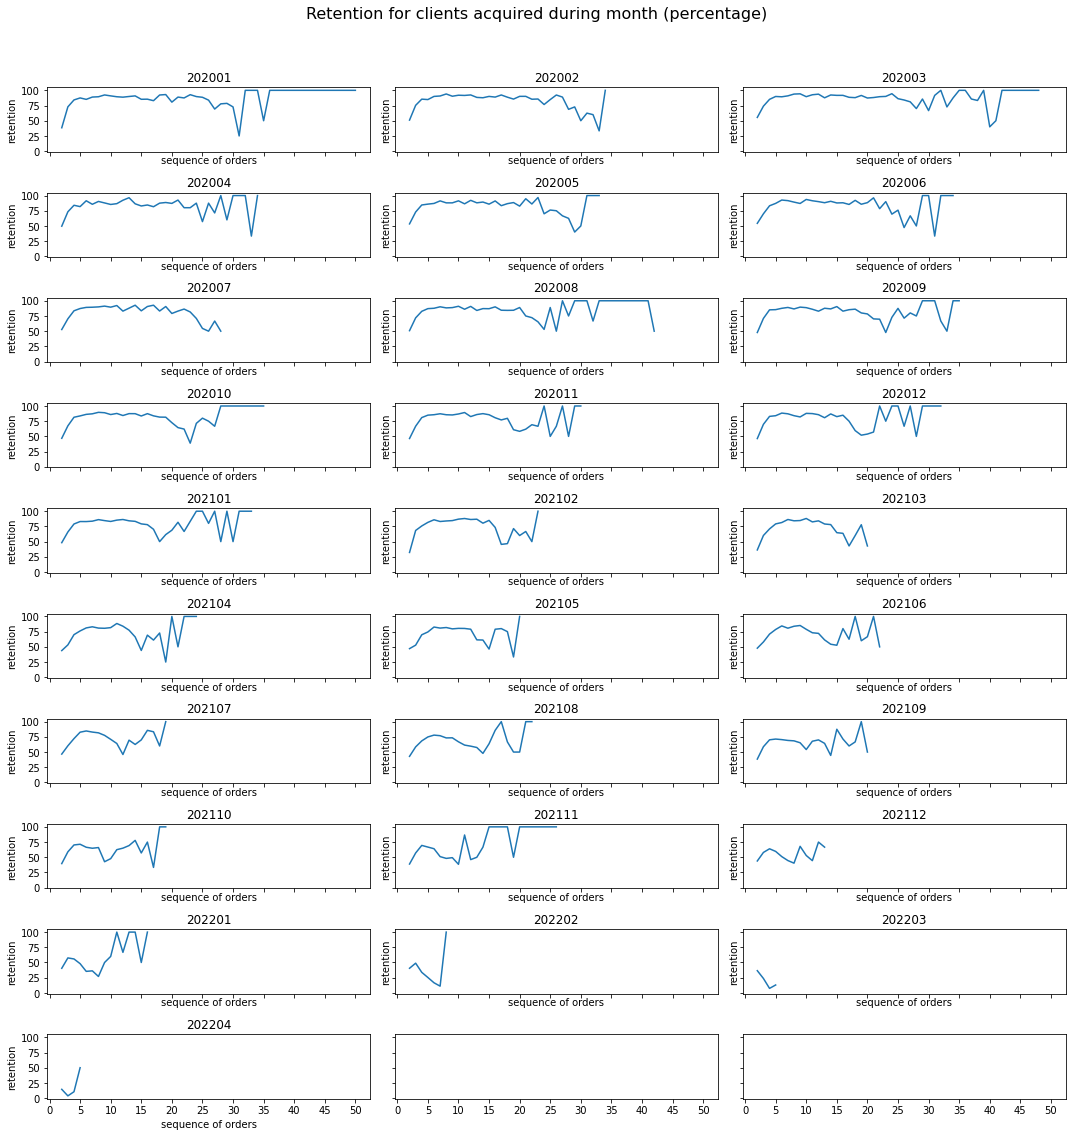

In [36]:
fig, axs = plt.subplots(r, 3, sharex='all', sharey='all',figsize=(15,15))
rr=0
cn=0
mm=tmp['ORDER_SEQUENCE'].max()
for c in m:    
    a=tmptmp.loc[(tmptmp['TRIAL_WEEK_ym']==c)].copy()
    axs[rr,cn].plot(a['ORDER_SEQUENCE'],a['num_orders_prev_change'], label=c)
    axs[rr,cn].set_title(c)
    axs[rr,cn].xaxis.set_ticks(np.arange(0, mm+5, 5))
    axs[rr,cn].yaxis.set_ticks(np.arange(0, 105, 25))
    axs[rr,cn].set_ylabel('retention', fontsize=10)
    axs[rr,cn].set_xlabel('sequence of orders', fontsize=10)
    cn+=1
    if cn==3:
        cn=0
        rr+=1
#plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=10)
fig.tight_layout()
fig.suptitle('Retention for clients acquired during month (percentage)', y=1.05, fontsize=16)
plt.show()
plt.close()

In [37]:
a=tmptmp.loc[tmptmp['ORDER_SEQUENCE']==2][['num_orders_prev_change']]
print(f"Average retention of clients after first order is {a['num_orders_prev_change'].mean():.2f}% (median: {a['num_orders_prev_change'].median():.2f}%)")

Average retention of clients after first order is 43.98% (median: 46.47%)


In [38]:
display(tmptmp.head())

,TRIAL_WEEK_ym,ORDER_SEQUENCE,num_orders,TRIAL_WEEK_ym_seq,num_orders_prev,num_orders_prev_change
1,202001,2,652,202001_2,1696,38.4434
2,202001,3,475,202001_3,652,72.8528
3,202001,4,400,202001_4,475,84.2105
4,202001,5,350,202001_5,400,87.5
5,202001,6,298,202001_6,350,85.1429


In [39]:
tmptmp['num_orders_prev_change']=tmptmp['num_orders_prev_change'].astype(float)

In [40]:
df_piv=pd.pivot_table(tmptmp,index=['TRIAL_WEEK_ym'], columns=['ORDER_SEQUENCE'],values=['num_orders_prev_change'])
df_piv.columns = df_piv.columns.get_level_values(1)
df_piv.to_excel(writer, sheet_name='Order_sequence_pcnt', startrow=1, header=True, index=True)


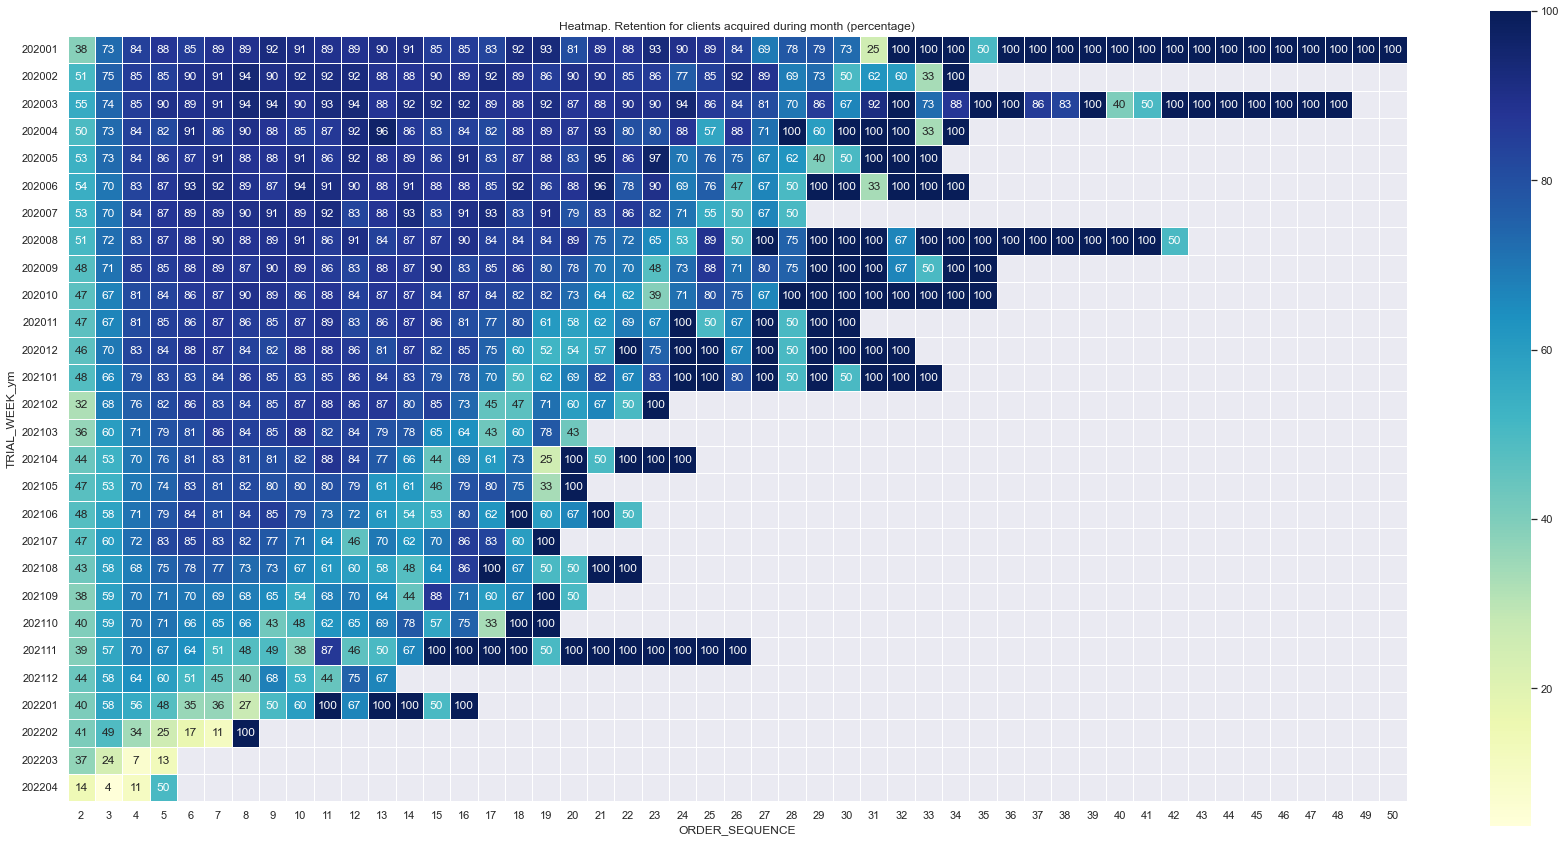

In [41]:

sns.set()
fig, ax = plt.subplots(figsize=(30,30)) 
sns.heatmap(df_piv, annot=True, cmap="YlGnBu", linewidths=.5, ax=ax, cbar_kws={"shrink": 0.5}, square=True, fmt='.0f')
plt.title('Heatmap. Retention for clients acquired during month (percentage)')
plt.show()
plt.close()

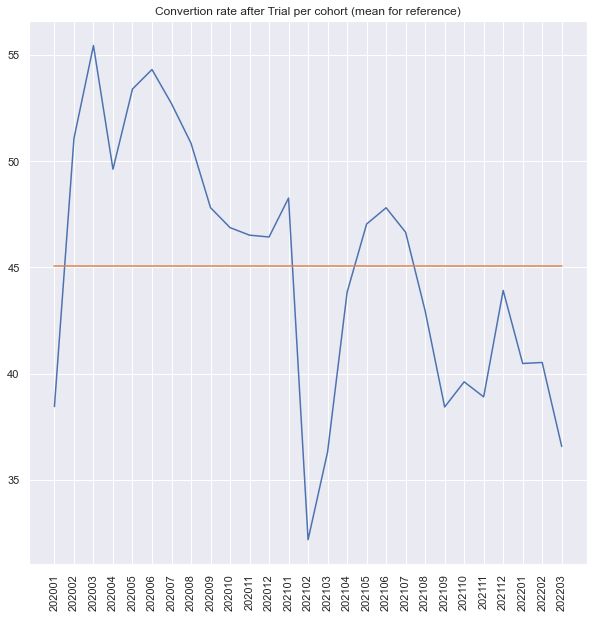

 Mean convertion rate 45.07 %


In [42]:
# How good is the convertion rate per cohort

a=tmptmp.loc[tmptmp['ORDER_SEQUENCE']==2].copy()
a=a.iloc[:-1] #will remove last month as it seems to be not matured
plt.plot(a['TRIAL_WEEK_ym'],a['num_orders_prev_change'])
t=[a['num_orders_prev_change'].mean()]*a.shape[0]
plt.plot(a['TRIAL_WEEK_ym'],t)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by degrees
# plt.legend()
plt.title("Convertion rate after Trial per cohort (mean for reference)")
plt.show()

print(f" Mean convertion rate {a['num_orders_prev_change'].mean():.2f} %")

In [43]:
#performance by month (clients)

tmp=df_c.groupby(['TRIAL_WEEK_ym'])[cid].size().reset_index().copy()
display(tmp)

,TRIAL_WEEK_ym,CUSTOMER_ID
0,202001,1696
1,202002,1541
2,202003,1019
3,202004,792
4,202005,927
5,202006,1031
6,202007,1292
7,202008,1357
8,202009,1897
9,202010,2430


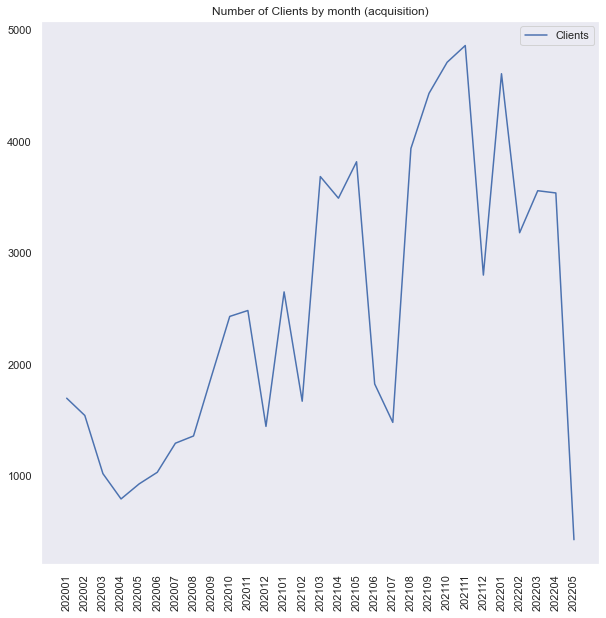

In [44]:
plt.title('Number of Clients by month (acquisition)')
plt.plot(tmp['TRIAL_WEEK_ym'],tmp[cid], label="Clients")
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by degrees
plt.legend()
plt.grid(color='lightgrey', linestyle=':', linewidth=1)
plt.show()

## Financial insignts

In [45]:
# What is GMV (revenue) and LTV (margin) per client?
tmp=df_o[[cid,'REVENUE', 'MARGIN']].groupby([cid]).sum().reset_index().copy()
tmp=tmp.sort_values('MARGIN')

print("-----------------------")
print('top 10 least profitable clients')
display(tmp.head(10))

-----------------------
top 10 least profitable clients


,CUSTOMER_ID,REVENUE,MARGIN
9991,3457816330339,5850.50,-3369.52
10370,3482995720291,4166.25,-2794.69
2549,2227322290275,5705.00,-1966.35
6383,3077670895715,3199.75,-1927.42
24444,5121211301987,3387.75,-1831.82
58139,5699660447843,4271.00,-1810.84
6116,3053485031523,2421.00,-1742.31
11579,3560307720291,3878.00,-1707.32
37019,5335257120867,3649.75,-1517.63
7793,3264068485219,2775.50,-1317.11


In [46]:
tmp.head(10).to_excel(writer, sheet_name='Profitability', startrow=1, header=True, index=False)

In [47]:
print("-----------------------")
print('top 10 most profitable clients')
display(tmp.tail(10))

-----------------------
top 10 most profitable clients


,CUSTOMER_ID,REVENUE,MARGIN
8795,3372885213283,7290.00,3080.53
8953,3390889623651,5332.75,3199.99
10742,3502425374819,7026.75,3352.10
6146,3056196059235,9214.00,3383.08
8532,3340544966755,8186.50,3609.11
1215,858645594211,8681.75,3691.30
18659,3787943280739,6464.75,3800.92
8697,3357307142243,8116.50,3834.50
5673,3028349419619,7152.00,3867.93
3490,2926965850211,8748.75,4924.95


In [48]:
tmp.tail(10).to_excel(writer, sheet_name='Profitability', startrow=15, header=True, index=False)

### What share of all clients have positive LTV (margin)?

In [49]:
#how many clients with positive / negative LTV margin?
num_pos=tmp.loc[tmp['MARGIN']>=0].shape[0]
num_clients=tmp.shape[0]
print(f"{num_pos} clients create profit ({100*num_pos/len(customers):.2f} %)")

# total GMV, total Margin 
print(f"Total:\nGMV: {tmp['REVENUE'].sum():.2f} \nLVT: {tmp['MARGIN'].sum():.2f}")
print(f"Margin to GMV: {tmp['MARGIN'].sum()/tmp['REVENUE'].sum():.2f}")
print(f"------------------\nPer client:\nGMV per client: {tmp['REVENUE'].sum()/num_clients:.2f} \nLVT per client: {tmp['MARGIN'].sum()/num_clients:.2f}")


26479 clients create profit (36.48 %)
Total:
GMV: 18501775.32 
LVT: 3284294.13
Margin to GMV: 0.18
------------------
Per client:
GMV per client: 254.93 
LVT per client: 45.25


In [50]:
#total profit to total loss

In [51]:
# what is result for those only on trial
tmptmp=tmp.loc[tmp[cid].isin(not_converted)].copy()
print(f"Total  (have only Trial) ~ cost of Trials \nGMV: {tmptmp['REVENUE'].sum():.2f} \nLVT: {tmptmp['MARGIN'].sum():.2f}")
print(f"Margin to GMV: {100*tmptmp['MARGIN'].sum()/tmptmp['REVENUE'].sum():.2f}%")

Total  (have only Trial) ~ cost of Trials 
GMV: 2520479.70 
LVT: -1032105.57
Margin to GMV: -40.95%


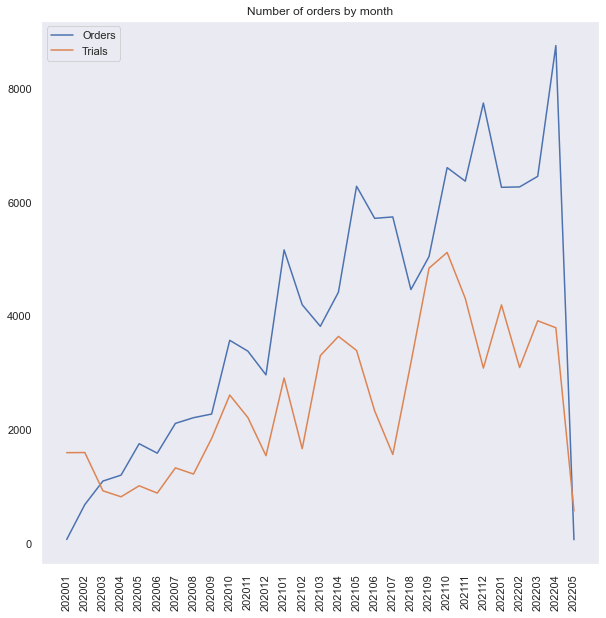

There can be lag between 1) marketing campaigns 2) trials (result of campaigns) and 3) next order (subscription after trial)


In [52]:
#orders by month, week
tmp=df_o.loc[(df_o['ORDER_TYPE']=='SUBSCRIPTION')].copy()
tmptmp=tmp.groupby(['ORDER_DATE_ym']).agg('size').reset_index()
tmptmp.rename(columns={0:'num_orders'}, inplace=True)

tmp=df_o.loc[(df_o['ORDER_TYPE']=='TRIAL')].copy()
tmptmp2=tmp.groupby(['ORDER_DATE_ym']).agg('size').reset_index()
tmptmp2.rename(columns={0:'num_trials'}, inplace=True)

plt.title('Number of orders by month')
plt.plot(tmptmp['ORDER_DATE_ym'],tmptmp['num_orders'], label="Orders")
plt.plot(tmptmp2['ORDER_DATE_ym'],tmptmp2['num_trials'], label="Trials")
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by degrees
plt.legend()
plt.grid(color='lightgrey', linestyle=':', linewidth=1)
plt.show()

print("There can be lag between 1) marketing campaigns 2) trials (result of campaigns) and 3) next order (subscription after trial)")


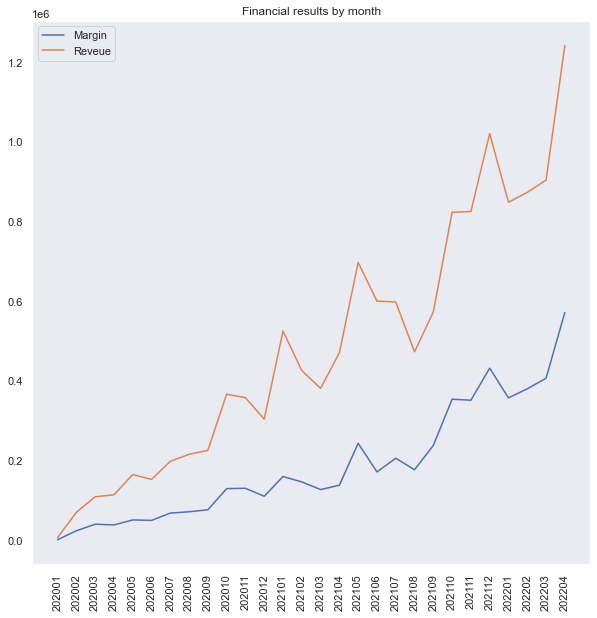

In [53]:
tmp=df_o.loc[(df_o['ORDER_TYPE']=='SUBSCRIPTION')].copy()
tmptmp=tmp.groupby(['ORDER_DATE_ym'])[['REVENUE','MARGIN']].sum().reset_index().copy()

#will remove last month as it is not complete
tmptmp=tmptmp[:-1]

plt.title('Financial results by month')
plt.plot(tmptmp['ORDER_DATE_ym'],tmptmp['MARGIN'], label="Margin")
plt.plot(tmptmp['ORDER_DATE_ym'],tmptmp['REVENUE'], label="Reveue")
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by degrees
plt.grid(color='lightgrey', linestyle=':', linewidth=1)
plt.legend()
plt.show()

In [54]:
#Close EXCEL
writer.save()